# Install Libraries

In [1]:
pip install pyteomics

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [3]:
import google_sheet
from pyteomics import mzml
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

plt.rcParams["figure.figsize"] = (12,5)

# Import Google Reference Sheet as a Pandas DataFrame

In [4]:
reference_sheet = google_sheet.main()

Cannabinoids
COMPLETE: Data copied


In [5]:
# Visualize Reference Sheet (Pandas DataFrame)

reference_sheet

,Index,Name,Common Name,Molecular Weight (g/mol),Spectrum,Spec Energy (eV),m/z,Standard Intensity,Chromatography Type,Retention time (sec),Melting Point (°C),Boiling Point (°C),Type,SMILES
0,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,203.0,99.99,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
1,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,204.0,15,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
2,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,229.0,7,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
3,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,233.0,3,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
4,1,Cannabidivarin,CBDV,286.4,LC-MS/MS,10.0,287.2,,LC-MS/MS,312,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,13,Tetrahydrocannabinolic Acid,THCA,358.5,"GC-MS,3",10.0,256,100,,,333,586,Cannabinoids,CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1C(=O)O)O
172,13,Tetrahydrocannabinolic Acid,THCA,358.5,"GC-MS,3",10.0,257,30,,,333,586,Cannabinoids,CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1C(=O)O)O
173,13,Tetrahydrocannabinolic Acid,THCA,358.5,LC-MS/MS,10.0,341.2,,LC-MS/MS,798,333,586,Cannabinoids,CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1C(=O)O)O
174,13,Tetrahydrocannabinolic Acid,THCA,358.5,LC-MS/MS,10.0,219.1,,LC-MS/MS,798,333,586,Cannabinoids,CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1C(=O)O)O


# Import Mass Spectrometry (MS) Dataset

In [6]:
# Import Dataset of Cannabis Sativa MS Spectra as a list of dictionaries
# Each dictionary corresponds to 1 spectrum

data = list(mzml.read("peak/21Cansat07253pos.mzML"))

In [7]:
# Visualize Dataset Structure (list of dictionaries), which contains metadata + data

data

[{'index': 0,
  'id': 'controllerType=0 controllerNumber=1 scan=1',
  'defaultArrayLength': 1930,
  'scanList': {'count': 1,
   'scan': [{'scanWindowList': {'count': 1,
      'scanWindow': [{'scan window lower limit': 100.0 m/z,
        'scan window upper limit': 1500.0 m/z}]},
     'scan start time': 0.0085269676 minute,
     'filter string': 'FTMS + c ESI Full ms [100.0000-1500.0000]',
     'preset scan configuration': 1.0,
     'ion injection time': 100.000001490116 millisecond}],
   'no combination': ''},
  'MS1 spectrum': '',
  'ms level': 1,
  'positive scan': '',
  'centroid spectrum': '',
  'base peak m/z': 158.961492 m/z,
  'base peak intensity': 5245954.5 number of detector counts,
  'total ion current': 53526044.0,
  'lowest observed m/z': 100.076042175293 m/z,
  'highest observed m/z': 1359.356567382813 m/z,
  'spectrum title': '21Cansat07253pos.1.1. File:"21Cansat07253pos.raw", NativeID:"controllerType=0 controllerNumber=1 scan=1"',
  'count': 2,
  'm/z array': array([ 100

# Data Visualization

In [150]:
# Rescaling the intensity array to range from 0-100

data[0]['intensity array'] = (data[0]['intensity array'] - min(data[0]['intensity array'])) / (max(data[0]['intensity array']) - min(data[0]['intensity array'])) * 100

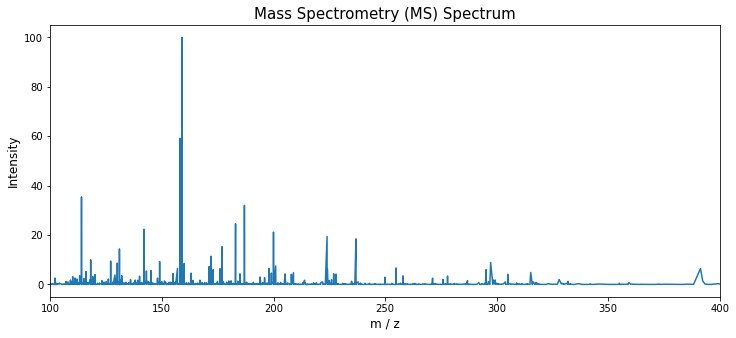

In [151]:
# Visualize first spectrum

plt.plot(data[0]['m/z array'], data[0]['intensity array'])
plt.title('Mass Spectrometry (MS) Spectrum', fontsize=15)
plt.xlabel('m / z', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.xlim([100,400])
plt.show()

# Detect peaks

Let's detect all peaks in the spectrum above a threshold equal to 1% with at least a distance of 10 between each other.

In [188]:
# Detect peaks
peaks_index, _ = signal.find_peaks(data[0]['intensity array'], height=1, distance=10)

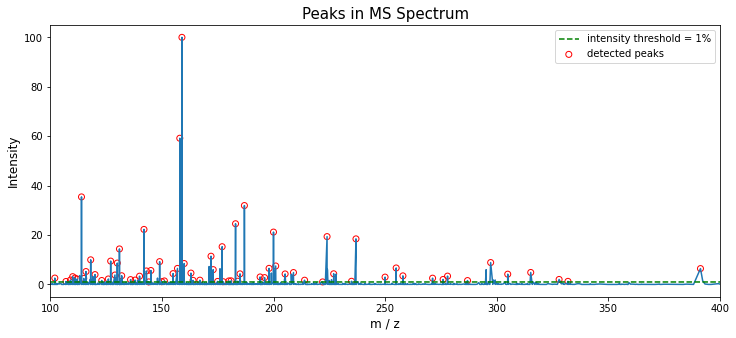

In [189]:
# Plot the detected peaks
# The 1% threshold is plotted as a dashed green line

plt.plot(data[0]['m/z array'], data[0]['intensity array'])
plt.scatter(data[0]['m/z array'][peaks_index], data[0]['intensity array'][peaks_index], facecolors='none', edgecolors='r', label='detected peaks')
plt.plot(data[0]['m/z array'], np.full(len(data[0]['m/z array']), 1), "--", color='green', label='intensity threshold = 1%')
plt.title('Peaks in MS Spectrum', fontsize=15)
plt.xlabel('m / z', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.xlim([100,400])
plt.legend()
plt.show()

# Check for a peak at the molecular weight +- 1 +- 0.1

In [190]:
# Visualize Reference Sheet (Pandas DataFrame)

reference_sheet

,Index,Name,Common Name,Molecular Weight (g/mol),Spectrum,Spec Energy (eV),m/z,Standard Intensity,Chromatography Type,Retention time (sec),Melting Point (°C),Boiling Point (°C),Type,SMILES
0,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,203.0,99.99,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
1,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,204.0,15,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
2,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,229.0,7,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
3,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,233.0,3,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
4,1,Cannabidivarin,CBDV,286.4,LC-MS/MS,10.0,287.2,,LC-MS/MS,312,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,13,Tetrahydrocannabinolic Acid,THCA,358.5,"GC-MS,3",10.0,256,100,,,333,586,Cannabinoids,CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1C(=O)O)O
172,13,Tetrahydrocannabinolic Acid,THCA,358.5,"GC-MS,3",10.0,257,30,,,333,586,Cannabinoids,CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1C(=O)O)O
173,13,Tetrahydrocannabinolic Acid,THCA,358.5,LC-MS/MS,10.0,341.2,,LC-MS/MS,798,333,586,Cannabinoids,CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1C(=O)O)O
174,13,Tetrahydrocannabinolic Acid,THCA,358.5,LC-MS/MS,10.0,219.1,,LC-MS/MS,798,333,586,Cannabinoids,CCCCCC1=CC2=C(C3C=C(CCC3C(O2)(C)C)C)C(=C1C(=O)O)O


In [191]:
# Create and visualize Pandas DataFrame with all data for one molecule, for exmaple Cannabidivarin (CBDV)

molecule_df = reference_sheet[reference_sheet['Index'] == '1']
molecule_df

,Index,Name,Common Name,Molecular Weight (g/mol),Spectrum,Spec Energy (eV),m/z,Standard Intensity,Chromatography Type,Retention time (sec),Melting Point (°C),Boiling Point (°C),Type,SMILES
0,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,203.0,99.99,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
1,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,204.0,15,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
2,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,229.0,7,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
3,1,Cannabidivarin,CBDV,286.4,GC-MS,10.0,233.0,3,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
4,1,Cannabidivarin,CBDV,286.4,LC-MS/MS,10.0,287.2,,LC-MS/MS,312,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
5,1,Cannabidivarin,CBDV,286.4,LC-MS/MS,10.0,165.1,,LC-MS/MS,312,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
6,1,Cannabidivarin,CBDV,286.4,LC-MS/MS,10.0,123.1,,LC-MS/MS,312,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
7,1,Cannabidivarin,CBDV,286.4,,,,,UPLC,90,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
8,1,Cannabidivarin,CBDV,286.4,,,,,HPLC,210,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O
9,1,Cannabidivarin,CBDV,286.4,Cayman MS,10.0,203.0,99.99,,,118,165,Cannabinoids,CCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O


In [192]:
# Get molecular weight value for that molecule and store m/z value from the spectrum data, if any, 
# that is +- 1 +- 0.1 of the molecular weight value in mol_weight_match array
# If no such value, mol_weight_match array is empty and molecule is not present in the MS spectrum

molecular_weight = float(molecule_df['Molecular Weight (g/mol)'].iloc[0])
mol_weight_match = [i for i in data[0]['m/z array'][peaks_index] if np.isclose(molecular_weight, i, atol=0.6).any()]

# mol_weight_match = [
#     i for i in data[0]['m/z array'][peaks_index] if (
#         np.isclose(molecular_weight, i, atol=0.1) or
#         np.isclose(molecular_weight - 1, i, atol=0.1) or
#         np.isclose(molecular_weight + 1, i, atol=0.1)
#     ).any()
# ]

print('Is there a peak in the MS spectrum at the molecular weight +- 1 +- 0.1?')
if np.any(mol_weight_match):
    print('Yes! The molecular weight of Cannabidivarin (CBDV) is '+str(molecular_weight)+' and the MS spectrum has a peak at '+str(mol_weight_match[0]))
else:
    print('No! The molecule Cannabidivarin (CBDV) is not present in this MS Spectrum.')

Is there a peak in the MS spectrum at the molecular weight +- 1 +- 0.1?
Yes! The molecular weight of Cannabidivarin (CBDV) is 286.4 and the MS spectrum has a peak at 286.92096


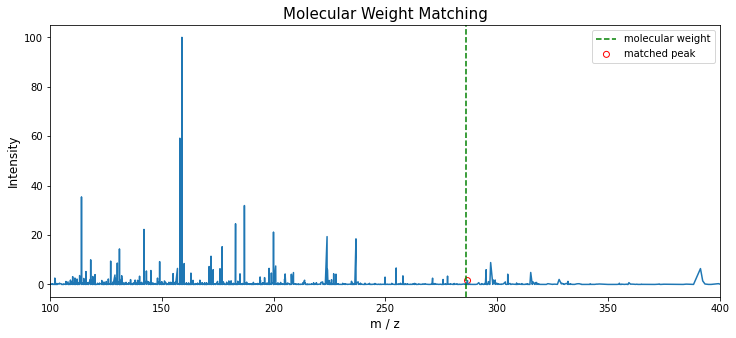

In [193]:
mol_weight_index = np.where(data[0]['m/z array'] == mol_weight_match[0])[0][0]

plt.plot(data[0]['m/z array'], data[0]['intensity array'])
plt.scatter(data[0]['m/z array'][mol_weight_index], data[0]['intensity array'][mol_weight_index], facecolors='none', edgecolors='r', label='matched peak')
plt.axvline(x = molecular_weight, color = 'green', linestyle='dashed', label='molecular weight')
plt.title('Molecular Weight Matching', fontsize=15)
plt.xlabel('m / z', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.legend()
plt.xlim([100,400])
plt.show()

# Check for at least 5 peaks at the molecule's standard m/z’s +- 1 +- 0.1
# Check that 2 of the 3 highest peaks are the mol ion and base ion peaks
# Output the m/z and intensity of the top 3 matched peaks

In [194]:
# If there is a peak at the molecular weight +- 1 +- 0.1, 
# remove rows of molecule_df with duplicate m/z values and
# create np array of all the standard m/z's for that molecule

molecule_df = molecule_df.drop_duplicates('m/z')
molecule_mz = np.array(list(filter(None, molecule_df['m/z']))).astype(float)
print("All the standard m/z's for the molecule Cannabidivarin (CBDV) are ")
print(np.sort(molecule_mz))

All the standard m/z's for the molecule Cannabidivarin (CBDV) are 
[123.1 165.1 174.  203.  204.  218.  229.  233.  286.  287.2]


In [213]:
# Check if there are peaks at those m/z’s +- 1 +- 0.1
# by creating a 2D array where each element is a pair of m/z values from MS spectrum and reference sheet 

peak_matches = np.array([[i, j] for i in data[0]['m/z array'][peaks_index] for j in molecule_mz if np.isclose(i, j, atol=2).any()])

# peak_matches = np.array([
#     [i, j] for i in data[0]['m/z array'][peaks_index] for j in molecule_mz if (
#         np.isclose(i, j, atol=0.1) or
#         np.isclose(i, j + 1, atol=0.1) or
#         np.isclose(i, j - 1, atol=0.1)
#     ).any()
# ])

# Removing duplicate spectrum peaks that matched different standard m/z's
unique_rows, unique_indices = np.unique(peak_matches[:, 0], return_index=True, axis=0)
peak_matches = peak_matches[unique_indices]

# Removing duplicate standard m/z's that matched different spectrum type 
# and keeping the m/z whose intensity is closest to standard intensity
unique_rows = []
for row in peak_matches:
    if not unique_rows or unique_rows[-1][1] != row[1]:
        unique_rows.append(row)
    else:
        int_0 = data[0]['intensity array'][peaks_index][np.where(data[0]['m/z array'][peaks_index] == unique_rows[-1][0])[0][0]]
        stand_int = molecule_df.loc[molecule_df['m/z'] == str(unique_rows[-1][1]), 'Standard Intensity'].iloc[0]
        int_1 = data[0]['intensity array'][peaks_index][np.where(data[0]['m/z array'][peaks_index] == row[0])[0][0]]
        if stand_int == '':
            if abs(np.sqrt(unique_rows[-1][0]) - np.sqrt(unique_rows[-1][1])) > abs(np.sqrt(row[0]) - np.sqrt(row[1])):
                unique_rows[-1] = row  
        else:
            if abs(np.sqrt(int_0) - np.sqrt(float(stand_int))) > abs(np.sqrt(int_1) - np.sqrt(float(stand_int))):
                unique_rows[-1] = row  
peak_matches = np.array(unique_rows)

In [231]:
# If there are less than 5 matched peaks, molecule is not present in the MS spectrum
# Otherwise, confirm that molecule is present by checking that 2 of the 3 highest peaks
# are the mol ion peak and the base ion peak

print("Are there at least 5 peaks in the MS spectrum at any of the m/z's +- 1 +- 0.1?")

if len(peak_matches) >= 5:
    # Create list of intensities of the matched m/z's from the MS spectrum
    indices = [np.where(data[0]['m/z array'][peaks_index] == value)[0][0] for value in peak_matches[:, 0]]
    intensity = [data[0]['intensity array'][peaks_index][index] for index in indices]

    # Store in list top_intensity the 3 highest intensity values
    # Store the m/z values corresponding to those highest peaks in the top_mz list
    top_intensity = sorted(intensity, reverse=True)[:3]
    indices = [np.where(data[0]['intensity array'][peaks_index] == intensity)[0][0] for intensity in top_intensity]
    top_mz = [data[0]['m/z array'][peaks_index][index] for index in indices]
    
    # Store the standard m/z values corresponding to the 3 highest peaks in the top_standard_mz list
    # Check that 2 of the 3 highest peaks are the mol ion peak and the base ion peak
    indices = [np.where(peak_matches[:, 0] == value)[0][0] for value in top_mz]
    top_standard_mz = [peak_matches[:, 1][index] for index in indices]
    mol_ion_peak = 174.0
    base_ion_peak = 204.0
    if all(x in top_standard_mz[:2] for x in [mol_ion_peak, base_ion_peak]):
        print('Yes! There are '+str(len(peak_matches))+" peaks in the MS spectrum that match the standard m/z's of Cannabidivarin (CBDV)")
        print("and the 2 of the 3 highest peaks are the mol ion peak and the base ion peak.")
        print('The molecule Cannabidivarin (CBDV) is present in this MS Spectrum!')
        print((molecule_df['Name'].iloc[0], molecule_df['Common Name'].iloc[0], top_mz, top_intensity))
    # If 2 of the 3 highest peaks are not the mol ion peak and the base ion peak, the molecule is not present
    else:
        print('No! The molecule Cannabidivarin (CBDV) is not present in this MS Spectrum.')

else:
    print('No! The molecule Cannabidivarin (CBDV) is not present in this MS Spectrum.')

Are there at least 5 peaks in the MS spectrum at any of the m/z's +- 1 +- 0.1?
Yes! There are 6 peaks in the MS spectrum that match the standard m/z's of Cannabidivarin (CBDV)
and the 2 of the 3 highest peaks are the mol ion peak and the base ion peak.
The molecule Cannabidivarin (CBDV) is present in this MS Spectrum!
('Cannabidivarin', 'CBDV', [172.97716, 205.1949, 163.94038], [5.9909635, 4.2458496, 1.6575707])


In [93]:
peak_matches

array([[123.04414368, 123.1       ],
       [163.94038391, 165.1       ],
       [167.01293945, 165.1       ],
       [172.97715759, 174.        ],
       [174.95343018, 174.        ],
       [205.19490051, 204.        ],
       [234.95141602, 233.        ],
       [286.92095947, 287.2       ],
       [286.92095947, 286.        ]])

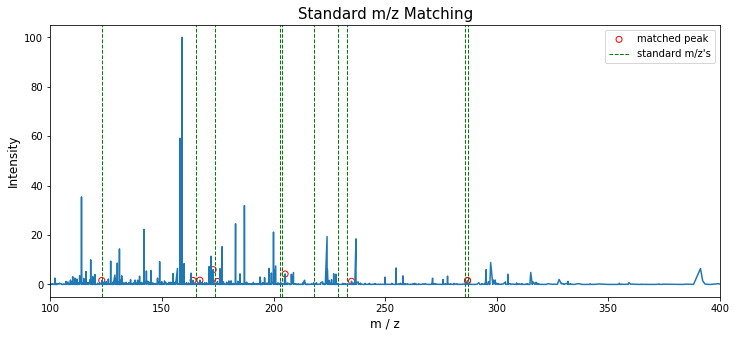

In [94]:
indices = [index for index, value in enumerate(data[0]['m/z array'][peaks_index]) if value in peak_matches[:, 0]]
intensity = [data[0]['intensity array'][peaks_index][index] for index in indices]
intensity.append(intensity[-1])

plt.plot(data[0]['m/z array'], data[0]['intensity array'])
plt.scatter(peak_matches[:, 0], intensity, facecolors='none', edgecolors='r', label='matched peak')
plt.vlines(x = molecule_mz, ymin = -5, ymax = 105, color = 'green', linestyle='dashed', label="standard m/z's", linewidth=1)
plt.title('Standard m/z Matching', fontsize=15)
plt.xlabel('m / z', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.legend()
plt.xlim([100,400])
plt.ylim([-5,105])
plt.show()

In [96]:
peak_matches

array([[123.04414368, 123.1       ],
       [163.94038391, 165.1       ],
       [167.01293945, 165.1       ],
       [172.97715759, 174.        ],
       [174.95343018, 174.        ],
       [205.19490051, 204.        ],
       [234.95141602, 233.        ],
       [286.92095947, 287.2       ]])

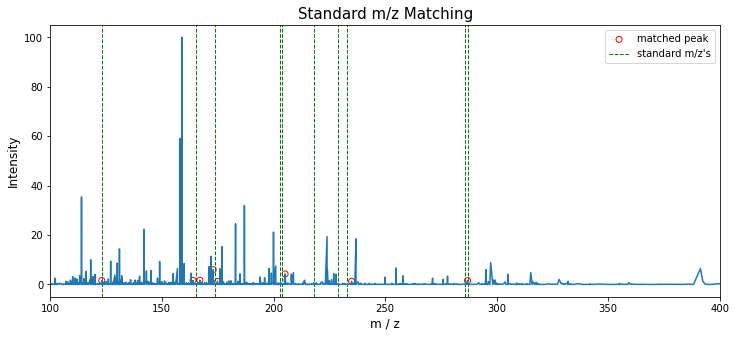

In [97]:
indices = [index for index, value in enumerate(data[0]['m/z array'][peaks_index]) if value in peak_matches[:, 0]]
intensity = [data[0]['intensity array'][peaks_index][index] for index in indices]

plt.plot(data[0]['m/z array'], data[0]['intensity array'])
plt.scatter(peak_matches[:, 0], intensity, facecolors='none', edgecolors='r', label='matched peak')
plt.vlines(x = molecule_mz, ymin = -5, ymax = 105, color = 'green', linestyle='dashed', label="standard m/z's", linewidth=1)
plt.title('Standard m/z Matching', fontsize=15)
plt.xlabel('m / z', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.legend()
plt.xlim([100,400])
plt.ylim([-5,105])
plt.show()

In [99]:
peak_matches

array([[123.04414368, 123.1       ],
       [163.94038391, 165.1       ],
       [172.97715759, 174.        ],
       [205.19490051, 204.        ],
       [234.95141602, 233.        ],
       [286.92095947, 287.2       ]])

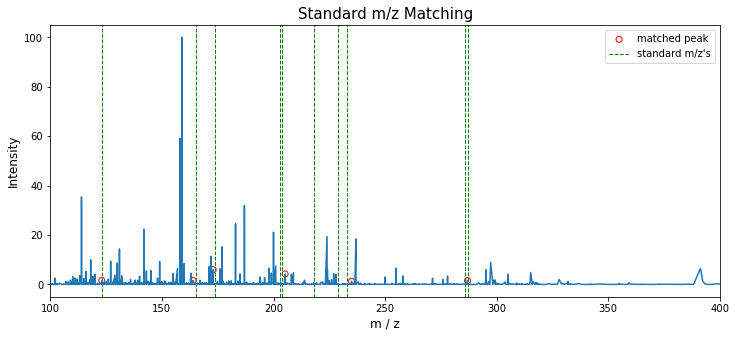

In [100]:
indices = [index for index, value in enumerate(data[0]['m/z array'][peaks_index]) if value in peak_matches[:, 0]]
intensity = [data[0]['intensity array'][peaks_index][index] for index in indices]

plt.plot(data[0]['m/z array'], data[0]['intensity array'])
plt.scatter(peak_matches[:, 0], intensity, facecolors='none', edgecolors='r', label='matched peak')
plt.vlines(x = molecule_mz, ymin = -5, ymax = 105, color = 'green', linestyle='dashed', label="standard m/z's", linewidth=1)
plt.title('Standard m/z Matching', fontsize=15)
plt.xlabel('m / z', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.legend()
plt.xlim([100,400])
plt.ylim([-5,105])
plt.show()

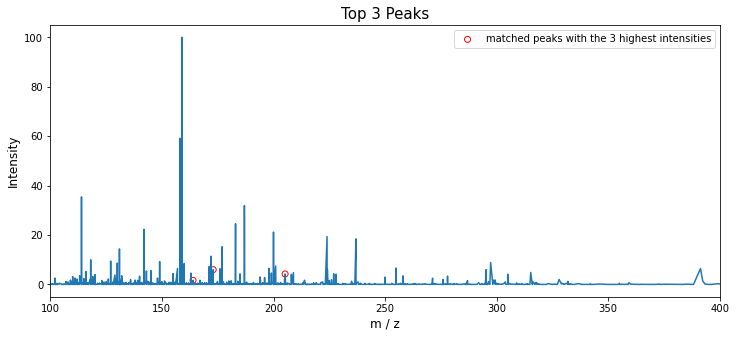

In [102]:
plt.plot(data[0]['m/z array'], data[0]['intensity array'])
plt.scatter(top_mz, top_intensity, facecolors='none', edgecolors='r', label='matched peaks with the 3 highest intensities')
plt.title('Top 3 Peaks', fontsize=15)
plt.xlabel('m / z', fontsize=12)
plt.ylabel('Intensity', fontsize=12)
plt.legend()
plt.xlim([100,400])
plt.ylim([-5,105])
plt.show()

In [623]:
# # Create list of standard intensities of the matched standard m/z's
# standard_intensity = [molecule_df.loc[molecule_df['m/z'] == str(mz), 'Standard Intensity'].iloc[0] for mz in peak_matches[:, 1]]

# # Delete rows from the 2D array that have unknown standard intensities
# empty_indices = [index for index, value in enumerate(standard_intensity) if value == '']
# filtered_peak_matches = np.delete(peak_matches, empty_indices, axis=0)

# # Delete empty elements from list of standard intensities and convert all string elements to floats
# standard_intensity = list(filter(None, standard_intensity))
# standard_intensity = [float(i) for i in standard_intensity]

# # Create list of intensities of the matched m/z's from the MS spectrum
# indices = [index for index, value in enumerate(data[0]['m/z array'][peaks_index]) if value in filtered_peak_matches[:, 0]]
# intensity = [data[0]['intensity array'][peaks_index][index] for index in indices]

# # Calculate the ratios of intensity over standard_intensity
# ratios = np.array(intensity) / np.array(standard_intensity)

# # Calculate the mean of the ratios
# quantity = np.mean(ratios)

# print('There is '+str(quantity*100)+'% of the molecule Cannabidivarin (CBDV) in this compound.')

There is 37.023071977827286% of the molecule Cannabidivarin (CBDV) in this compound.


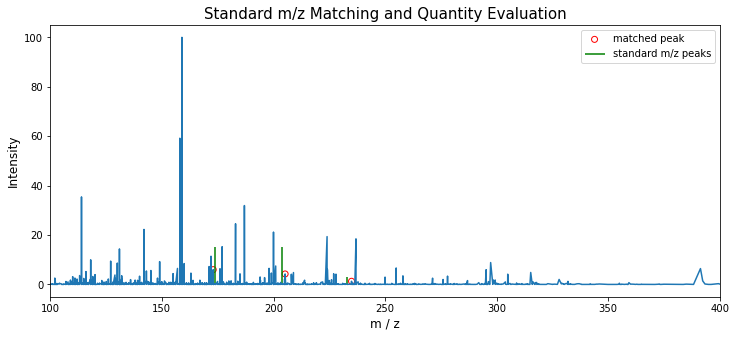

In [562]:
# plt.plot(data[0]['m/z array'], data[0]['intensity array'])
# plt.scatter(filtered_peak_matches[:, 0], intensity, facecolors='none', edgecolors='r', label='matched peak')
# plt.vlines(x = filtered_peak_matches[:, 1], ymin = 0, ymax = standard_intensity, color = 'green', label="standard m/z peaks")
# plt.title('Standard m/z Matching and Quantity Evaluation', fontsize=15)
# plt.xlabel('m / z', fontsize=12)
# plt.ylabel('Intensity', fontsize=12)
# plt.legend()
# plt.xlim([100,400])
# plt.ylim([-5,105])
# plt.show()

# Model Function

**PSEUDO CODE**

*Function*: detect_molecule(reference_sheet, mz_data, intensity_data, intensity_threshold=1, distance_threshold=10, mz_threshold=0.1, num_peak_threshold=5)
<br>function that identifies the molecules present in an MS spectrum and their quantities
<br>
<br>detect all peaks in the spectrum with intensity above intensity_threshold=1% and with at least a distance of <br>distance_threshold=10 m/z between each other (to represent the fragmentation pattern)
<br>for all molecules in reference sheet:
<br> &nbsp; &nbsp; &nbsp; &nbsp; check if there is a peak at the molecular weight +- mz_threshold=0.1
<br> &nbsp; &nbsp; &nbsp; &nbsp; (e.g. for molecular weight of 286.4, need a peak between m/z of 287.0 and 285.8)
<br> &nbsp; &nbsp; &nbsp; &nbsp;  if no peak at molecular weight:
<br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; molecule is not present in spectrum
<br> &nbsp; &nbsp; &nbsp; &nbsp; if there is peak:
<br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; pull all the molecule’s standard m/z’s from reference sheet
<br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; check if there are peaks at those m/z’s +- mz_threshold=2 
<br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; if there are over num_peak_threshold=5 of those peaks in spectrum:
<br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; molecule is present in spectrum
<br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; amount = intensity / standard intensity
<br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; otherwise:
<br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; molecule is not present in spectrum

In [261]:
def detect_molecules(reference_sheet, mz_data, intensity_data, intensity_threshold=1, distance_threshold=10, mz_threshold=0.1, num_peak_threshold=5):
#function that identifies the molecules present in an MS spectrum and their quantities

    # raise error if intensity_threshold is not within 0-10 range
    if intensity_threshold < 0 or intensity_threshold > 10:
        raise ValueError('detect_molecules: intensity_threshold must be between 0 and 10.')

    # raise error if distance_threshold is not within 0-10 range
    if distance_threshold < 0 or distance_threshold > 10:
        raise ValueError('detect_molecules: distance_threshold must be between 0 and 10.')

    # raise error if mz_threshold is not within 0-0.2 range
    if mz_threshold < 0 or mz_threshold > 0.2:
        raise ValueError('detect_molecules: mz_threshold must be between 0 and 0.2.')

    # raise error if num_peak_threshold is not 3, 4, or 5
    VALID_num_peak_threshold = [3, 4, 5]
    if num_peak_threshold not in VALID_num_peak_threshold:
        raise ValueError('detect_molecules: num_peak_threshold must be one of %r.' % VALID_num_peak_threshold)

    # np array of the index of every peak in the spectrum above intensity_threshold
    # with at least an m/z distance of distance_threshold between each other
    peaks_index, _ = signal.find_peaks(intensity_data, height=intensity_threshold, distance=distance_threshold)
    
    # redefine mz_data and intensity_data as arrays of the detected peaks' mz and intensity
    mz_data = mz_data[peaks_index]
    intensity_data = intensity_data[peaks_index]

    # create empty list of name and quantity of detected molecules
    detected_molecules = []
    
    # iterate over all molecules in reference sheet
    for molecule_index in reference_sheet['Index'].unique():
        
        # create dataframe with all data for one molecule
        molecule_df = reference_sheet[reference_sheet['Index'] == molecule_index]
        
        # molecular weight value for that molecule
        molecular_weight = float(molecule_df['Molecular Weight (g/mol)'].iloc[0])
        
        # create list of peak at the molecular weight +- 1 +- mz_threshold,
        mol_weight_match = [
            i for i in mz_data if (
                np.isclose(molecular_weight - 1, i, atol=mz_threshold) or
                np.isclose(molecular_weight, i, atol=mz_threshold) or
                np.isclose(molecular_weight + 1, i, atol=mz_threshold)
            ).any()
        ]

        # if at least one peak at the molecular weight +-1 +- mz_threshold
        if np.any(mol_weight_match):
            
            # remove rows of molecule_df with duplicate m/z values
            molecule_df = molecule_df.drop_duplicates('m/z')

            # np array of all the standard m/z's for that molecule
            molecule_mz = np.array(list(filter(None, molecule_df['m/z']))).astype(float)
            
            # create list of peaks at the reference m/z’s +- 1 +- mz_threshold             
            peak_matches = np.array([
                [i, j] for i in mz_data for j in molecule_mz if (
                    np.isclose(i, j - 1, atol=mz_threshold) or
                    np.isclose(i, j, atol=mz_threshold) or
                    np.isclose(i, j + 1, atol=mz_threshold)
                ).any()
            ])
                        
            # remove duplicate spectrum peaks that matched different standard m/z's
            unique_rows, unique_indices = np.unique(peak_matches[:, 0], return_index=True, axis=0)
            peak_matches = peak_matches[unique_indices]

            # remove duplicate standard m/z's that matched different spectrum peaks by
            # keeping the m/z whose intensity is closest to standard intensity when standard intensity is available
            # or keeping the m/z that is closest to standard m/z by square root
            unique_rows = []
            for row in peak_matches:
                if not unique_rows or unique_rows[-1][1] != row[1]:
                    unique_rows.append(row)
                else:
                    int_0 = intensity_data[np.where(mz_data == unique_rows[-1][0])[0][0]]
                    stand_int = molecule_df.loc[molecule_df['m/z'] == str(unique_rows[-1][1]), 'Standard Intensity'].iloc[0]
                    int_1 = intensity_data[np.where(mz_data == row[0])[0][0]]
                    if stand_int == '':
                        if abs(np.sqrt(unique_rows[-1][0]) - np.sqrt(unique_rows[-1][1])) > abs(np.sqrt(row[0]) - np.sqrt(row[1])):
                            unique_rows[-1] = row  
                    else:
                        if abs(np.sqrt(int_0) - np.sqrt(float(stand_int))) > abs(np.sqrt(int_1) - np.sqrt(float(stand_int))):
                            unique_rows[-1] = row  
            peak_matches = np.array(unique_rows)
                        
            # if number of peaks at the reference m/z’s +- 1 +- mz_threshold is greater than or equal to num_peak_threshold
            if len(peak_matches) >= num_peak_threshold:
                
                # create list of intensities of the matched m/z's from the MS spectrum
                indices = [np.where(mz_data == value)[0][0] for value in peak_matches[:, 0]]
                intensity = [intensity_data[index] for index in indices]

                # store in list top_intensity the 3 highest intensity values
                # store the m/z values corresponding to those highest peaks in the top_mz list
                top_intensity = sorted(intensity, reverse=True)[:3]
                indices = [np.where(intensity_data == intensity)[0][0] for intensity in top_intensity]
                top_mz = [mz_data[index] for index in indices]
    
                # store the standard m/z values corresponding to the 3 highest peaks in the top_standard_mz list
                indices = [np.where(peak_matches[:, 0] == value)[0][0] for value in top_mz]
                top_standard_mz = [peak_matches[:, 1][index] for index in indices]
                
                # store the standard m/z values of the mol ion peak and the base ion peak
                # in mol_ion_mz and base_ion_mz, respectively
### NEED TO CHANGE THIS ONCE WE KNOW THE WHERE mol_ion_mz and base_ion_mz ARE STORED IN THE DATASET
                mol_ion_mz = 174.0
                base_ion_mz = 204.0
                
                # if 2 of the 3 highest peaks are the mol ion peak and the base ion peak
                if all(x in top_standard_mz for x in [mol_ion_mz, base_ion_mz]):
                    
                    # append the name, acronym, and top 3 peaks’ m/z and intensity values
                    # of the detected molecule to the detected_molecules list
                    detected_molecules.append((molecule_df['Name'].iloc[0], molecule_df['Common Name'].iloc[0], top_mz, top_intensity))

                    # remove matched peaks of detected molecule from the spectrum data
                    mz_data = np.delete(mz_data, indices)
                    intensity_data = np.delete(intensity_data, indices)

                # if 2 of the 3 highest peaks are not the mol ion peak and the base ion peak,
                # molecule is not present, skip to next molecule
                else:
                    continue
                
            # if number of peaks at the reference m/z’s +-1 +- mz_threshold is less than num_peak_threshold, 
            # molecule is not present, skip to next molecule
            else:
                continue
            
        # if no peak at the molecular weight +-1 +- mz_threshold, molecule is not present, skip to next molecule
        else:
            continue     
                
    return detected_molecules

In [262]:
detect_molecules(reference_sheet, data[0]['m/z array'], data[0]['intensity array'])

[]